**Fake news classification Using ensembling in natural language preprocessing**

In [65]:
# Importing impotant libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [66]:
df=pd.read_csv("/content/drive/MyDrive/NLP/data.csv")

In [67]:
df.head(10)

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0
6,https://www.nytimes.com/2017/10/10/us/politics...,Kansas Tried a Tax Plan Similar to Trump’s. It...,"In 2012, Kansas lawmakers, led by Gov. Sam Bro...",1
7,https://www.reuters.com/article/us-india-cenba...,"India RBI chief: growth important, but not at ...",The Reserve Bank of India (RBI) Governor Urjit...,1
8,https://www.reuters.com/article/us-climatechan...,EPA chief to sign rule on Clean Power Plan exi...,"Scott Pruitt, Administrator of the U.S. Enviro...",1
9,https://www.reuters.com/article/us-air-berlin-...,Talks on sale of Air Berlin planes to easyJet ...,FILE PHOTO - An Air Berlin sign is seen at an ...,1


In [68]:
df.shape

(4009, 4)

In the above data in the Label column [ 1 = "REAL NEWS" and 0 = "FAKE NEWS"]

**EDA and preprocessing**

In [69]:
df.info() # we will get the information about null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [70]:
# we will drop the columns which is of not importance
df.drop(["URLs"],axis=1,inplace=True)

In [71]:
df.drop(["Headline"],axis=1,inplace=True)

In [72]:
df.head() # will check dataset again

,Body,Label
0,Image copyright Getty Images\nOn Sunday mornin...,1
1,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,The feud broke into public view last week when...,1
3,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,"Country singer Jason Aldean, who was performin...",1


In [73]:
df.dropna(inplace=True,axis=0,subset=["Body"])# drop the rows which has null values

In [74]:
df.info() # will check whether null values dropped or not

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3988 entries, 0 to 4008
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    3988 non-null   object
 1   Label   3988 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 93.5+ KB


In [75]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

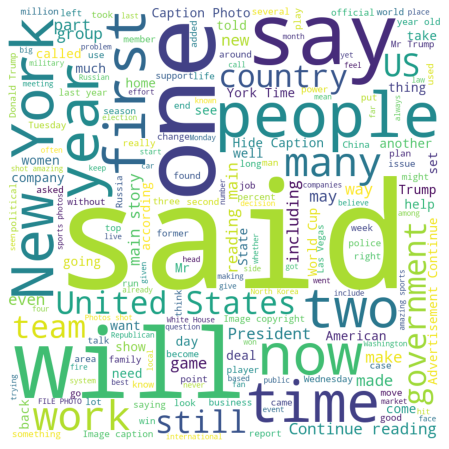

In [76]:
wc = WordCloud(width=800, 
               height=800, 
               background_color="white",
               min_font_size=10)

positive_reviews = " ".join(df[df["Label"] == 1]["Body"])

wc.generate(positive_reviews)

plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

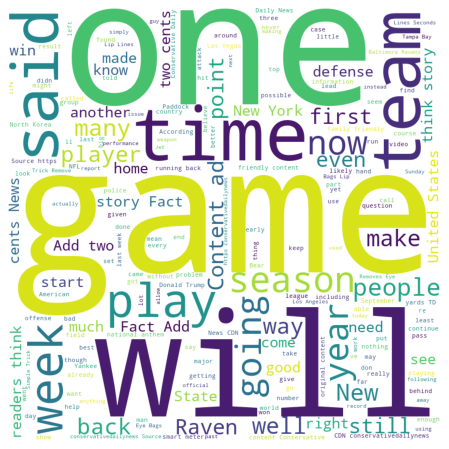

In [77]:
wc = WordCloud(width=800, 
               height=800, 
               background_color="white",
               min_font_size=10)

positive_reviews = " ".join(df[df["Label"] == 0]["Body"])

wc.generate(positive_reviews)

plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [78]:
# importing nltk libraries
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
# Creating the function which will remove stpwords, clean the tokens and apply lammatizer
def clean_documents(document):
  stop = stopwords.words('english')
  tokens = word_tokenize(document.lower())

  word_tokens = [token for token in tokens if token.isalpha()]
  clean_tokens = [token for token in word_tokens if token not in stop]

  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in clean_tokens]

  return " ".join(lemmatized_tokens)

In [80]:
df['Body']= df['Body'].apply(clean_documents)# applying function

In [81]:
# splitting feature and target
X = df["Body"] 
y = df["Label"]

In [82]:
# creating train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
# CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [85]:
# applying Randon forest which is an ensemble technique
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [86]:
rf = RandomForestClassifier(random_state=1 ,n_estimators=100)
rf.fit(X_train_cv, y_train)
y_pred = rf.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       616
           1       0.95      0.99      0.97       581

    accuracy                           0.97      1197
   macro avg       0.97      0.97      0.97      1197
weighted avg       0.97      0.97      0.97      1197



**Check the model whether is it good or bad**

In [87]:
msg1 = df[df.Label== 0]["Body"][5]
msg2 = df[df.Label== 1]["Body"][3]

In [88]:
def checksenews(text):
  ctext = clean_documents(text)
  x= cv.transform([ctext])
  ypred= rf.predict(x)
  return ypred[0]

In [89]:
checksenews(msg1)

0

In [90]:
checksenews(msg2)

1